# TP 4 : Analyse en composantes principales avec R

## Un esprit sain dans un corps sain

Ce sujet vous donne les moyens de conserver un esprit sain dans un corps sain. Dans un premier temps, il s'agira de prendre les mesures de ce corps à maintenir en forme (données `body.csv`). Pour cela, il est bien connu qu'une activité physique régulière est bénéfique à de nombreux de points de vue (données `athle.csv`) à condition de l'accompagner par une alimentation saine et équilibrée et ce, dès le petit déjeuner (données `cereal.txt`). Pour compléter le tout, un peu de réflexion mathématique mettra le cerveau au niveau de votre corps aguerri et bien alimenté !

## 1. Données `body`

Les données `body` sont composées d'un relevé de 5 variables morphologiques (tour d'épaule, tour de poitrine, tour de taille, masse et taille) chez 20 individus. La première étape consiste à importer ce jeu de données dans R avec la fonction `read.table()` (nous pourrions aussi utiliser `read.csv()` ou `read.csv2()`).

In [13]:
data_body <- read.table("data/body.csv", # Nom du fichier à importer
                        header=TRUE,     # Utiliser la première ligne du fichier pour les noms des colonnes
                        sep=";",         # Séparateur de champs
                        dec=",",         # Séparateur décimal
                        row.names=1)     # Utiliser la première colonne pour les noms des lignes

Pour calculer une ACP sur les données, nous pouvons utiliser la fonction `prcomp()`. Nous stockons le résultat retourné dans un objet appelé `acp_body` de notre espace de travail.

In [14]:
acp_body <- prcomp(data_body)

# Quelques vérifications
cat("Classe de l'objet :", class(acp_body), "\n")
cat("Type de l'objet :", mode(acp_body), "\n")
cat("Test du type 'list' :", is.list(acp_body), "\n")

Classe de l'objet : prcomp 
Type de l'objet : list 
Test du type 'list' : TRUE 


Les composantes de l'objet `acp_body` sont visibles grâce à la fonction `names()`.

In [15]:
names(acp_body)

[1] "sdev"     "rotation" "center"   "scale"    "x"

Pour accéder à un de ces éléments, il faut utiliser l'opérateur `$`.

In [16]:
acp_body$sdev

[1] 15.989241  7.757795  4.846040  2.933938  2.002735

Une description détaillée des éléments contenue dans un objet de la classe `prcomp` est fournie dans l'aide de la fonction `prcomp()`.

In [17]:
help(prcomp)

prcomp                  package:stats                  R Documentation

_P_r_i_n_c_i_p_a_l _C_o_m_p_o_n_e_n_t_s _A_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     Performs a principal components analysis on the given data matrix
     and returns the results as an object of class ‘prcomp’.

_U_s_a_g_e:

     prcomp(x, ...)
     
     ## S3 method for class 'formula'
     prcomp(formula, data = NULL, subset, na.action, ...)
     
     ## Default S3 method:
     prcomp(x, retx = TRUE, center = TRUE, scale. = FALSE,
            tol = NULL, rank. = NULL, ...)
     
     ## S3 method for class 'prcomp'
     predict(object, newdata, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula with no response variable, referring only to
          numeric variables.

    data: an optional data frame (or similar: see ‘model.frame’)
          containing the variables in the formula ‘formula’.  By
          default the variables are taken from ‘environment(

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Que renvoie la fonction <code>summary()</code> appliquée à l'objet <code>acp_body</code> ?</li>
        <li>Utilisez la fonction <code>plot()</code> avec l'objet <code>acp_body</code> pour représenter l'éboulis des valeurs propres. Combien de dimensions semble-t-il raisonnable de retenir pour les représentations graphiques ?</li>
        <li>À l'aide de la fonction <code>biplot</code>, représenter simultanément les individus et les variables sur le premier plan principal (PC1-PC2). Commenter.</li>
        <li>Représenter seulement les individus dans le premier plan principal (voir l'attribut <code>x</code> de l'objet <code>acp_body</code>) avec un codage en 2 couleurs dépendant d'un facteur <code>sexe</code> (les 10 premiers individus étant des hommes, les 10 suivants des femmes) :<br>
            <center><img src="img/body_plan_principal.png"></center></li>
    </ol>
</div>

Importance of components:
                           PC1    PC2     PC3     PC4    PC5
Standard deviation     15.9892 7.7578 4.84604 2.93394 2.0027
Proportion of Variance  0.7264 0.1710 0.06673 0.02446 0.0114
Cumulative Proportion   0.7264 0.8974 0.96414 0.98860 1.0000


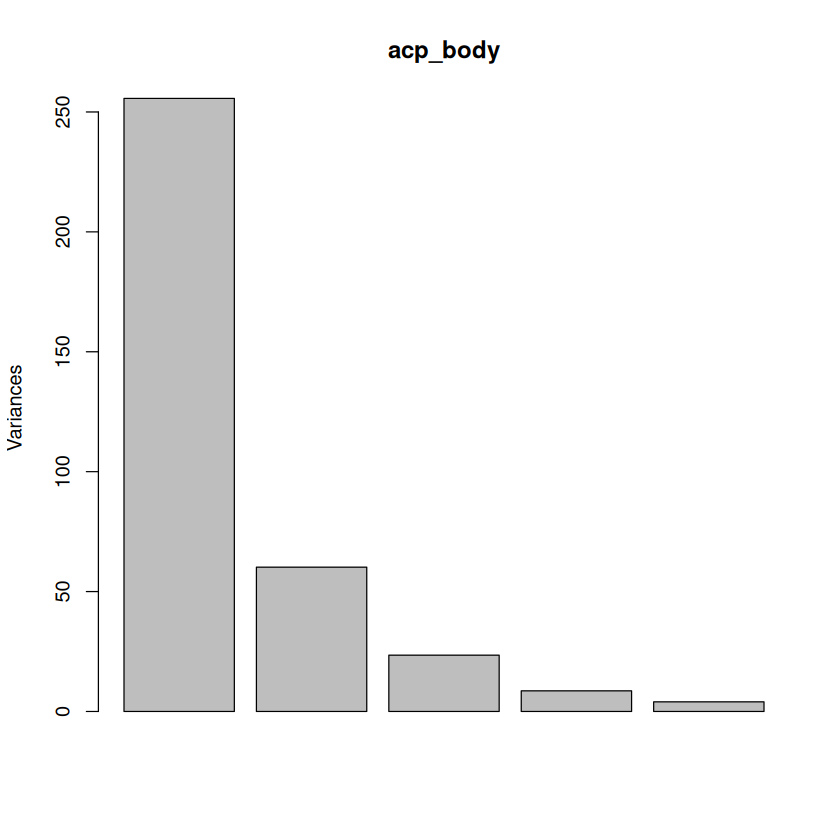

In [18]:
# À FAIRE
print(summary(acp_body))

par(bg = 'white')
plot(acp_body)
# deux (ou à la limite trois) composantes suffiront


            PC1        PC2        PC3         PC4         PC5
H1   -6.5019397 -4.4785316 -0.3695722 -1.02871294  1.26986295
H2    4.4012186  2.0363044  0.8103802  1.86829657  1.38431965
H3   22.6636431 -5.9423319 -6.1828240  0.11346164  1.96815617
H4    7.7823459 -5.2397037 -8.3777488  4.09685432 -1.73969993
H5   13.7331134 -2.6715786 -8.0229605  0.82287275 -2.14990718
H6   15.6699055 -0.1499503  4.4871642  2.33265535  4.39971617
H7   26.9907334  3.1929557  6.2852781  0.03819334 -3.07798836
H8   18.4137821 -3.4333593  5.6336309  1.08953837 -1.95643371
H9   -6.2466047 -8.4789149  4.9697289  0.79380551  1.86318277
H10  16.7799470 -3.6660935  1.9910331 -7.07920279  1.21682430
F1   -8.8315623 -0.7833012  0.2845113 -3.02332285  0.07326894
F2   -7.2806056 15.4060788 -2.3070957 -3.00465718 -2.35195961
F3   -6.4452955  2.2527466 -7.5997974  0.94739639  1.14528087
F4  -12.5068211  2.6818080  8.9145742  4.26952351 -1.52732383
F5   -3.6530565 20.7589392 -0.3022697 -2.44814934  1.99415865
F6   -0.

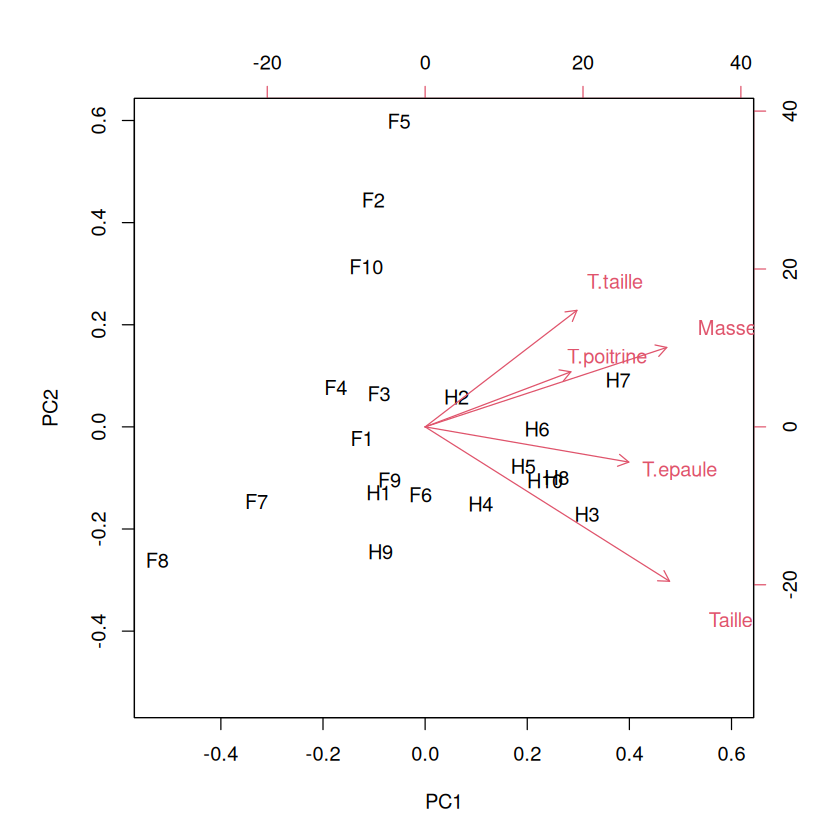

In [19]:
par(bg = 'white')
biplot(acp_body)

print(acp_body$x)

         H1          H2          H3          H4          H5          H6 
 -6.5019397   4.4012186  22.6636431   7.7823459  13.7331134  15.6699055 
         H7          H8          H9         H10          F1          F2 
 26.9907334  18.4137821  -6.2466047  16.7799470  -8.8315623  -7.2806056 
         F3          F4          F5          F6          F7          F8 
 -6.4452955 -12.5068211  -3.6530565  -0.6341877 -23.6149258 -37.4999136 
         F9         F10 
 -4.9806950  -8.2390817 


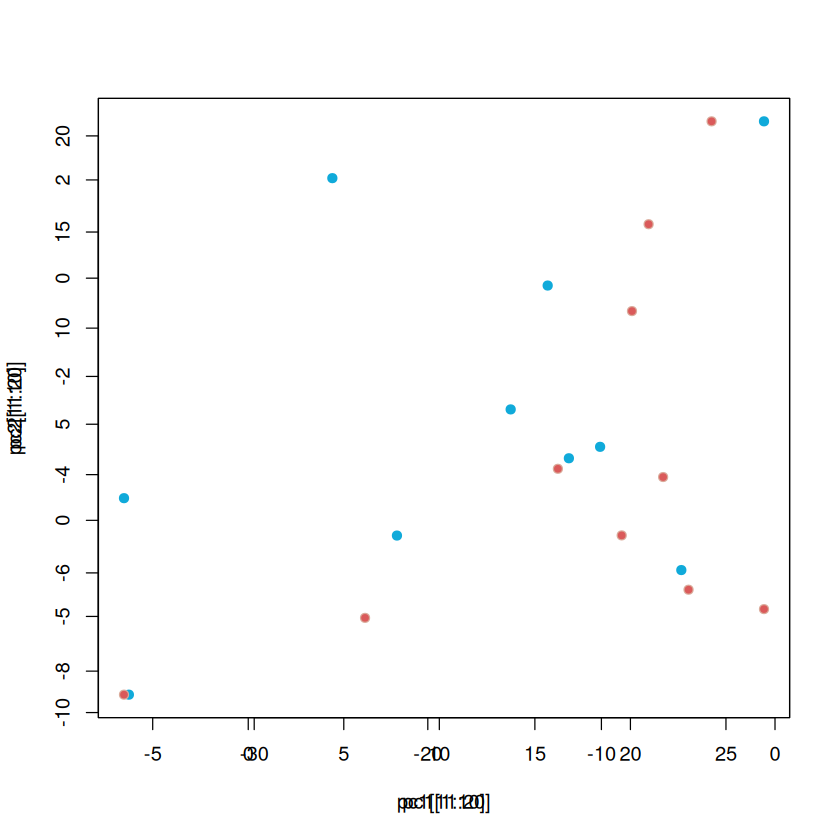

In [20]:
pc1 = acp_body$x[1:20,1]
pc2 = acp_body$x[1:20,2]

print(pc1)
par(bg = 'white')
plot(pc1[1:10], pc2[1:10], pch=21, type = "p", col="#10AADA", bg="#10AADA")
par(new=TRUE)
plot(pc1[11:20], pc2[11:20], pch=21,type = "p", col="#DAAA9A", bg="#DA5A5A")

## 2. Données `athle`

Les données `athle` sont constituées d'un relevé des records nationaux d'athlétisme en 2010 de 26 pays pour 9 épreuves de course, du 100m au marathon.

In [21]:
# Importation des données
data_athle <- read.table("data/athle.csv", header=TRUE, dec=",", row.names=1)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer une ACP sur ces données <code>data_athle</code>.</li>
        <li>Représenter l'éboulis des valeurs propres et le diagramme biplot. Commenter.</li>
        <li>Quel(s) pré-traitement(s) vous semble(nt) nécessaire(s) (transformation de données, suppression d'observations atypiques, ...) ? Effectuer quelques manipulations pour produire des résultats d'ACP plus parlants.</li>
    </ol>
</div>

Importance of components:
                            PC1      PC2      PC3     PC4     PC5     PC6
Standard deviation     325.8727 41.31132 20.18163 6.16698 2.52491 1.08938
Proportion of Variance   0.9801  0.01575  0.00376 0.00035 0.00006 0.00001
Cumulative Proportion    0.9801  0.99582  0.99958 0.99993 0.99999 1.00000
                          PC7    PC8     PC9
Standard deviation     0.4803 0.3018 0.06241
Proportion of Variance 0.0000 0.0000 0.00000
Cumulative Proportion  1.0000 1.0000 1.00000


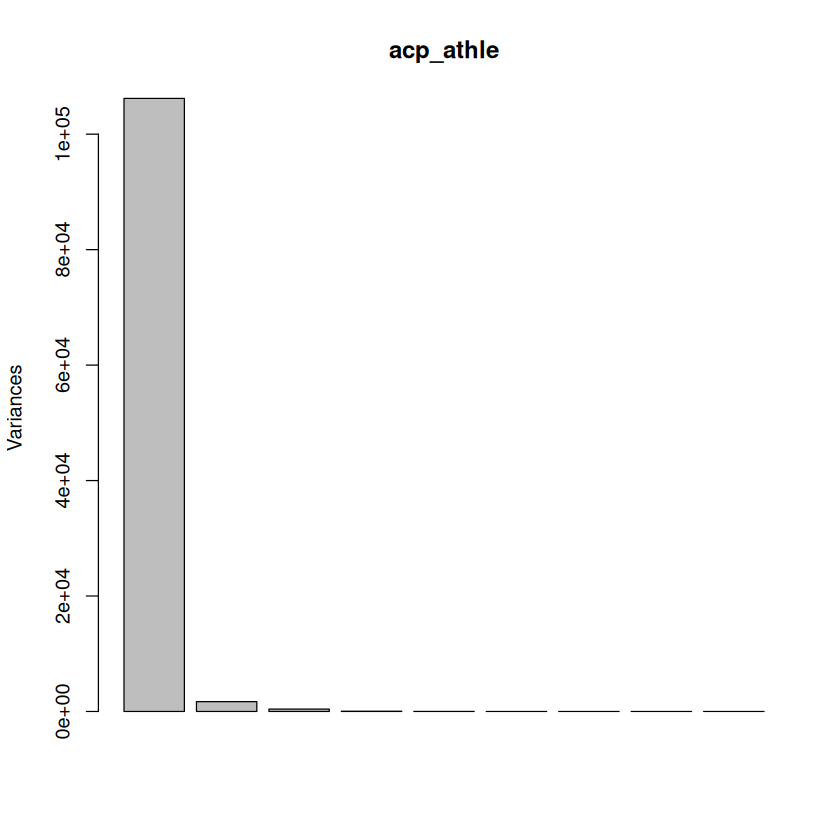

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”


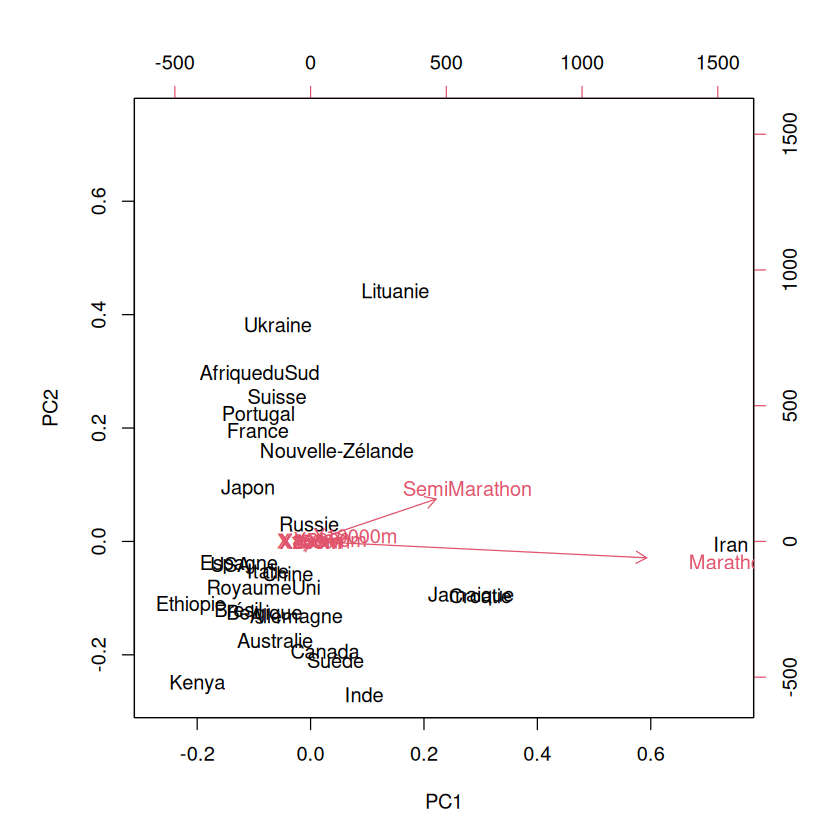

In [22]:
# ACP
acp_athle <- prcomp(data_athle)

# print and plot
print(summary(acp_athle))
par(bg = 'white')
plot(acp_athle)
# SAPERLIPOPETTE ! il faut normaliser car pc1 est beaucoup trop gros
biplot(acp_athle)

In [23]:
# library(ggplot2)
# library(reshape2)

# athle_long = melt(data_athle, id='country')

# ggplot(athle_long, aes(x = country, y = indicator, fill = value)) +
#   geom_tile(color = "white") +
#   scale_fill_gradient(low = "white", high = "red") +
#   labs(x = "Country", y = "Indicator", fill = "Value") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.1909 1.4954 0.9744 0.6668 0.47542 0.43444 0.27107
Proportion of Variance 0.5334 0.2485 0.1055 0.0494 0.02511 0.02097 0.00816
Cumulative Proportion  0.5334 0.7818 0.8873 0.9367 0.96184 0.98281 0.99097
                           PC8     PC9
Standard deviation     0.21995 0.18124
Proportion of Variance 0.00538 0.00365
Cumulative Proportion  0.99635 1.00000


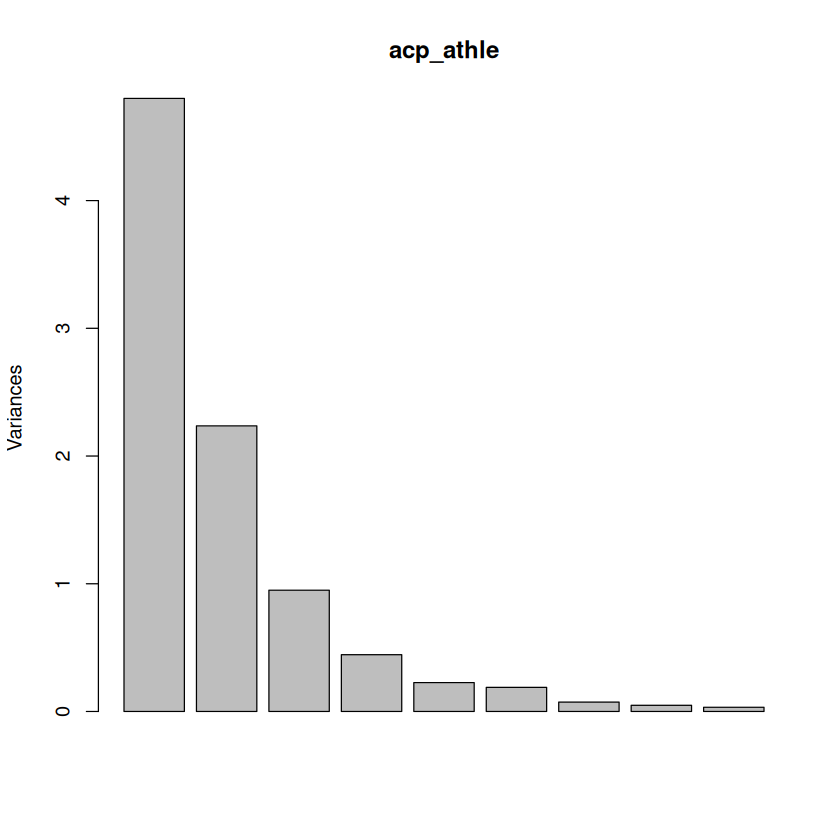

                 X100m X200m X400m  X800m X1500m X5000m X10000m SemiMarathon
Australie         9.93 20.06 44.38 104.40 211.96 775.76 1649.73         3602
Belgique         10.02 20.19 44.78 103.86 214.13 769.71 1612.30         3605
Brésil           10.00 19.89 44.29 101.77 213.25 799.43 1648.12         3573
RoyaumeUni        9.87 19.87 44.36 101.73 209.67 780.41 1638.14         3609
Canada            9.84 20.17 44.44 103.68 211.71 793.96 1656.01         3650
Chine            10.17 20.54 45.25 106.44 216.49 805.14 1670.00         3635
Croatie          10.25 20.76 45.64 104.07 213.30 817.76 1704.32         3827
Ethiopie         10.50 21.08 45.89 106.08 211.13 757.35 1577.53         3535
France            9.99 20.16 44.46 103.15 208.98 778.83 1642.78         3658
Allemagne        10.06 20.20 44.33 103.65 211.58 774.70 1641.53         3634
Inde             10.30 20.73 45.48 105.77 218.00 809.70 1682.89         3672
Iran             10.29 21.11 46.37 104.74 218.80 833.40 1762.65         4103

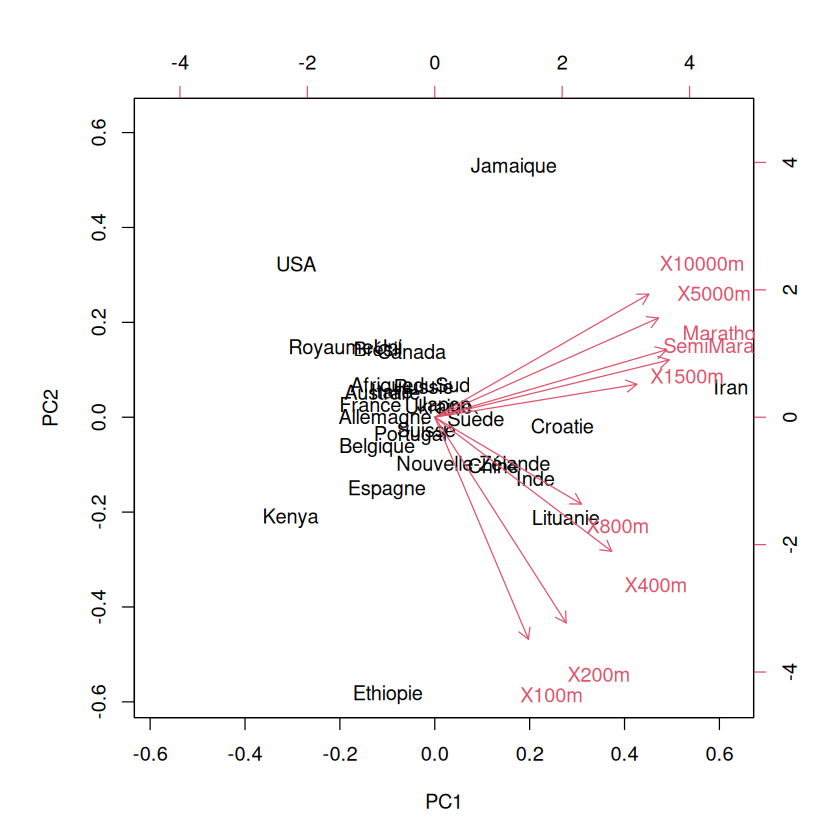

In [24]:
# ACP en normalisant
acp_athle <- prcomp(data_athle, scale=TRUE)
# aucune idée de comment éliminer les valeurs aberrantes si il y en a
# print and plot
print(summary(acp_athle))
par(bg = 'white')
plot(acp_athle)
biplot(acp_athle)
print(data_athle)


## 3. Données `cereal`

Les données `cereal` contiennent la composition (relevée en 1993 aux États-Unis) selon 9 variables quantitatives de 77 types de paquets de céréales consommés au petit-déjeuner. Le fabriquant (variable `mfr`) est également disponible dans le jeu de données.

  * `mfr` Manufacturer of cereal (A: American Home Food Products, G: General Mills, K: Kelloggs, N: Nabisco, P: Post, Q: Quaker Oats, R: Ralston Purina).
  * `calories` Calories per serving.
  * `protein` Grams of protein.
  * `fat` Grams of fat.
  * `sodium` Milligrams of sodium.
  * `fiber` Grams of dietary fiber.
  * `carbo` Grams of complex carbohydrates.
  * `sugars` Grams of sugars.
  * `potass` Milligrams of potassium.
  * `vitamins` Vitamins and minerals (0, 25 or 100, indicating the typical percentage of FDA recommended).

L'analyse de ce jeu de données a fait l'objet d'un concours proposé par l'*American Statistical Association* (sections *Statistical Computing* et *Statistical Graphics*) en 1993 sous le titre "*Serial Correlation or Cereal Correlation ?* " :

*Every two years the Section on Statistical Graphics sponsors a special exposition where one or more data sets are made available, analyzed by anyone interested and presented in a special poster session at the Annual Meeting.*

In [25]:
# Importation des données
data_cereal <- read.table("data/cereal.txt", header=TRUE, row.names=1)

In [26]:
data_cereal

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
100%_Bran,N,70,4,1,130,10.0,5.0,6,280,25
100%_Natural_Bran,Q,120,3,5,15,2.0,8.0,8,135,0
All-Bran,K,70,4,1,260,9.0,7.0,5,320,25
All-Bran_with_Extra_Fiber,K,50,4,0,140,14.0,8.0,0,330,25
Almond_Delight,R,110,2,2,200,1.0,14.0,8,90,25
Apple_Cinnamon_Cheerios,G,110,2,2,180,1.5,10.5,10,70,25
Apple_Jacks,K,110,2,0,125,1.0,11.0,14,30,25
Basic_4,G,130,3,2,210,2.0,18.0,8,100,25
Bran_Chex,R,90,2,1,200,4.0,15.0,6,125,25


Plusieurs packages proposent des fonctions pour calculer une ACP en offrant d'autres options que celles proposées par la fonction `prcomp()`. Un package très populaire dédié à l'analyse exploratoire de données multivariées est [`FactoMineR`](http://factominer.free.fr/) qui est maintenu par une équipe française (d'où les noms français de certains éléments). Nous vous proposons d'utiliser ce package pour le jeu de données `cereal`.

In [27]:
# Chargement du package FactoMineR
library(FactoMineR)

Le calcul de l'ACP se fait avec la fonction `PCA()` et nous pouvons utiliser l'argument `quali.sup=` pour omettre les variables qualitatives (`FactoMineR` parle de *variable supplémentaire*).

In [28]:
# Calcul de l'ACP
acp_cereal <- PCA(data_cereal, quali.sup=1)

La fonction `plot()` affiche le résultat dans le plan principal pour représenter les individus (`choix="ind"`) ou les variables (`choix="var"`).

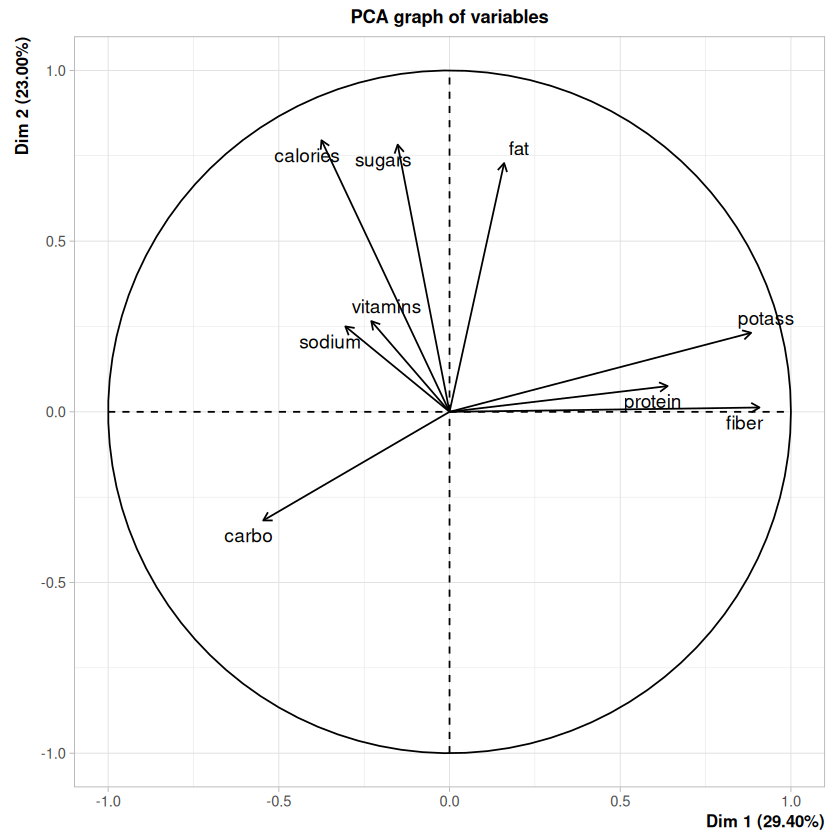

In [29]:
# Représentation des variables dans le plan principal
plot(acp_cereal, choix="var")

# la représentativité de PC1 / PC2 est pas folle 

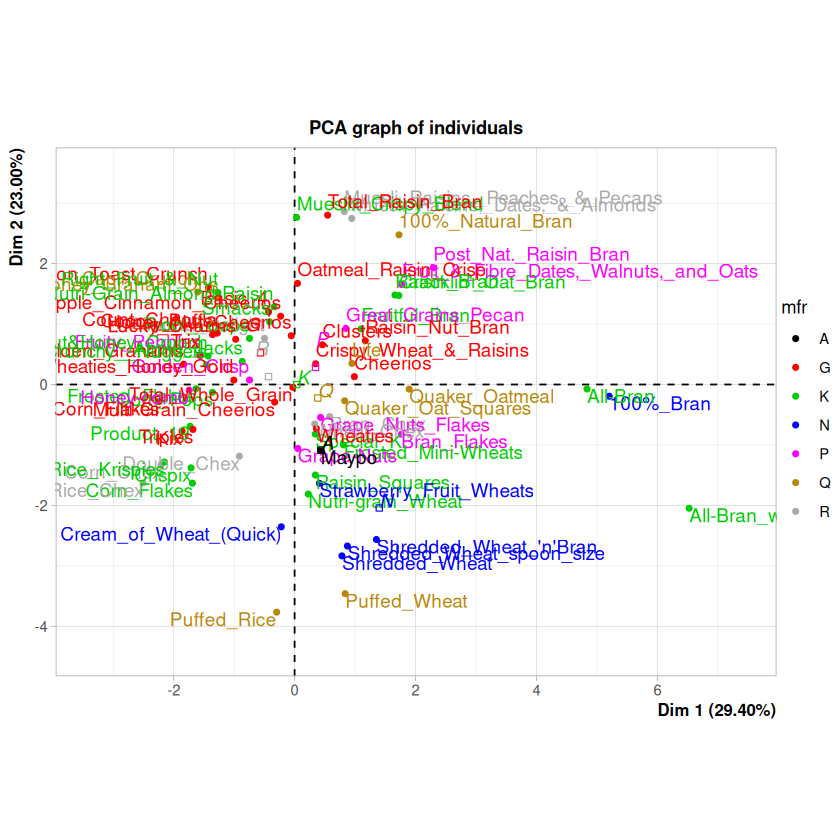

In [30]:
# Représentation des individus dans le plan principal en codant en couleur le fabriquant (colonne 1)
plot(acp_cereal, choix="ind", habillage=1)

<div class="alert alert-block alert-success">
    Pour suivre la recommandation <i>"Ne mange pas trop gras, trop salé, trop sucré"</i>, quelle(s) céréale(s) vaut-il mieux consommer ? Dans quelle zones du graphique de l'ACP se trouvent les céréales à éviter ?
</div>

## 4. Aspects mathématiques

Nous allons travailler avec une matrice à 5 lignes et 3 colonnes dont les éléments sont issus d'un tirage aléatoire sans remise d'entiers entre 1 et 15.

In [31]:
X <- matrix(sample(1:15, size=15), ncol=3)

Nous commençons par calculer l'ACP et représenter le diagramme biplot.

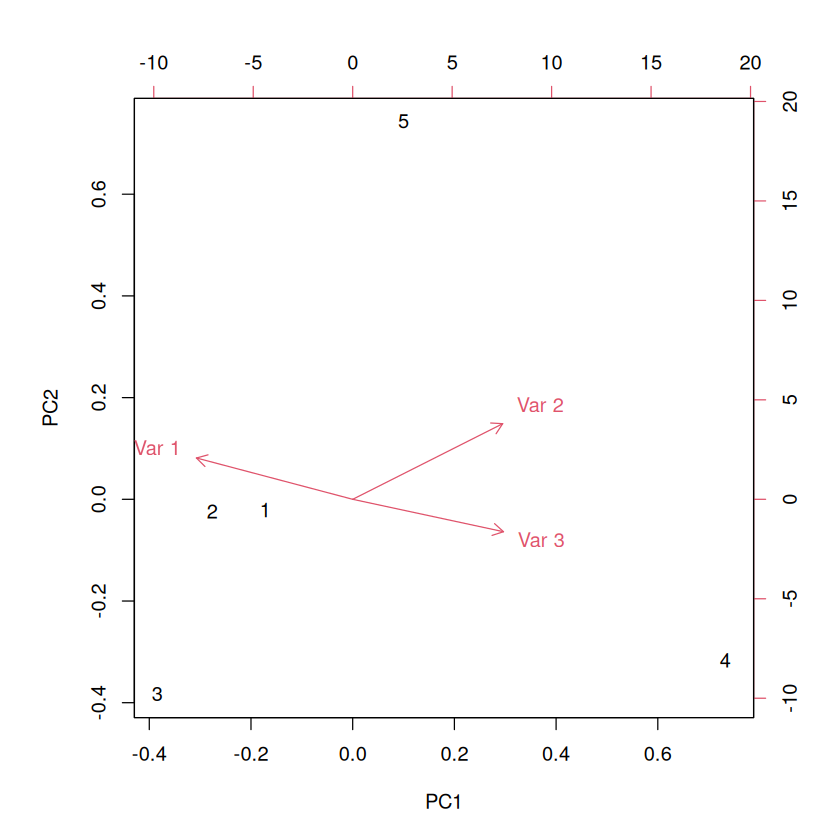

In [32]:
acp <- prcomp(X)
par(bg = 'white')

biplot(acp)

L'objectif des manipulations suivantes consiste à retrouver les valeurs issues de l'ACP présentes dans les composants de l'objet `acp` ou dans le résumé de l'objet obtenu avec la fonction `summary()`.

In [33]:
acp

Standard deviations (1, .., p=3):
[1] 7.417299 2.587590 2.527459

Rotation (n x k) = (3 x 3):
            PC1        PC2         PC3
[1,] -0.5921310  0.4487865  0.66930680
[2,]  0.5682854  0.8214286 -0.04802984
[3,]  0.5713429 -0.3519173  0.74143209

In [34]:
summary(acp)

Importance of components:
                          PC1     PC2    PC3
Standard deviation     7.4173 2.58759 2.5275
Proportion of Variance 0.8079 0.09832 0.0938
Cumulative Proportion  0.8079 0.90620 1.0000

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Une ACP étant une diagonalisation de la matrice de covariance, vérifier que les informations renvoyées par <code>prcomp()</code> sont similaires à celles calculées par la fonction <code>eigen()</code>. Commenter les différences si il y en a.</li>
        <li>Où retrouve-t-on les vecteurs propres renvoyés par <code>eigen()</code> dans l'objet <code>acp</code> ? Le signe de ces vecteurs est-il important ?</li>
        <li>Retrouver les résultats de l'ACP en procédant cette fois à la décomposition en valeurs singulières (fonction <code>svd()</code>) stockée dans un objet <code>s</code>.</li>
        <li>Vérifier que les vecteurs singuliers à droite (<code>s&dollar;v</code>) sont bien similaires au composant <code>rotation</code> du résultat de <code>prcomp()</code> et également aux vecteurs propres de la matrice de covariance (éventuellement au signe près).</li>
        <li>Concernant les valeurs singulières, vérifier que l'on retrouve les écarts-types renvoyés par <code>prcomp()</code> et les racines carrées des valeurs propres de la matrice de covariance.</li>
        <li>Retrouver les coordonnées des individus sur les composantes principales données par <code>acp&dollar;x</code>. Pour cela, nous pouvons par exemple faire le produit matriciel des données initiales et des vecteurs propres de la matrice de covariance.</li>
        <li>Procéder à des calculs analogues pour vérifier les calculs d'une ACP réduite (diagonalisation de la matrice des corrélations).</li>
    </ol>
</div>

In [35]:
# eigen values
sigma = t(X) %*% X * 1/45
print(eigen(sigma))
# eigne values en normalisant
## moyenne sur les colonnes 
m <- colMeans(X) 
print(m)
print(X)
print(X-m)# centrée
## inertie
I = 1/45 * sum((X-m)**2)
print("inertie")
print(I)
sigma = t(X-m) %*% (X-m) * 1/45
print(eigen(sigma))



eigen() decomposition
$values
[1] 22.3628762  4.6063219  0.5863575

$vectors
          [,1]       [,2]        [,3]
[1,] 0.6042421  0.7967224  0.01117418
[2,] 0.5707704 -0.4230074 -0.70376551
[3,] 0.5559790 -0.4316226  0.71034446



[1] 9.0 7.6 7.4
     [,1] [,2] [,3]
[1,]    9    6    4
[2,]   10    5    3
[3,]   14    2    7
[4,]    1   13   15
[5,]   11   12    8
     [,1] [,2] [,3]
[1,]  0.0 -1.4 -3.6
[2,]  2.4 -4.0 -4.4
[3,]  6.6 -5.6 -2.0
[4,] -8.0  5.6  7.4
[5,]  3.4  3.0  0.6
[1] "inertie"
[1] 6.8
eigen() decomposition
$values
[1] 5.8410293 0.6601014 0.2988693

$vectors
           [,1]      [,2]        [,3]
[1,]  0.6389824 0.7685818 -0.03136066
[2,] -0.5423073 0.4211996 -0.72697572
[3,] -0.5455312 0.4815318  0.68594665



In [39]:

print("deltas")
print(acp$rotation)
print(eigen(sigma))

[1] "deltas"
            PC1        PC2         PC3
[1,] -0.5921310  0.4487865  0.66930680
[2,]  0.5682854  0.8214286 -0.04802984
[3,]  0.5713429 -0.3519173  0.74143209
eigen() decomposition
$values
[1] 5.8410293 0.6601014 0.2988693

$vectors
           [,1]      [,2]        [,3]
[1,]  0.6389824 0.7685818 -0.03136066
[2,] -0.5423073 0.4211996 -0.72697572
[3,] -0.5455312 0.4815318  0.68594665



## 4. PCR vs PLS

Les but ici est de comparer les deux approches sur le jeux de données `DatairSDD`. Ce jeux de données contient des informations relative à la qualité de l'air. 
On cherche à expliquer la densité de monoxyne d'azote en fonction des autres variables. On comparera alors plusieurs méthodes de régression.

In [40]:
#install.packages("pls")
library("pls")


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Ajuster un modèle linéaire. </li>
        <li> Effectuer un régression en composante principale avec la fonction <code>pcr()</code>. </li>
        <li> Effectuer une regression PLS avec la fonction <code>plsr()</code>. </li>
        <li> Comparer les erreurs de ces trois modèles en termes d'erreur quadratique moyenne en fonction de nombre de composantes utilisées. <code>RMESP()</code> </li>
    </ol>
</div>

In [ ]:
# n: charge les données
data_air <- read.table("data/DatairSDD.csv", header=TRUE, row.names=1, sep=",") # ou read_csv
#print(data_air)

# n: aucune id
data_air <- data_air[, -1]
print(data_air)
head(data_air)


    NMHC.GT. PT08.S2.NMHC. NOx.GT. PT08.S3.NOx. NO2.GT. PT08.S4.NO2.
1        150          1046     166         1056     113         1692
2        112           955     103         1174      92         1559
3         88           939     131         1140     114         1555
4         80           948     172         1092     122         1584
5         51           836     131         1205     116         1490
6         38           750      89         1337      96         1393
7         31           690      62         1462      77         1333
8         31           672      62         1453      76         1333
9         24           609      45         1579      60         1276
10        19           561    -200         1705    -200         1235
11        14           527      21         1818      34         1197
12         8           512      16         1918      28         1182
13        16           553      34         1738      48         1221
14        29           667      98

In [47]:
# n: régression linéaire


# 2️⃣ Définir la variable dépendante et explicatives
y <- data_air$NOx.GT.
X <- data_air[, !colnames(data_air) %in% "NOx.GT."]

# 3️⃣ Modèle linéaire classique
lm_model <- lm(y ~ ., data = X)
summary(lm_model)



Call:
lm(formula = y ~ ., data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.578 -17.382  -1.736  10.872 107.797 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -337.94005   50.53181  -6.688 2.38e-10 ***
NMHC.GT.         0.07401    0.01969   3.758 0.000227 ***
PT08.S2.NMHC.   -0.03012    0.03935  -0.765 0.444926    
PT08.S3.NOx.     0.04591    0.02405   1.909 0.057746 .  
NO2.GT.          1.04474    0.03718  28.096  < 2e-16 ***
PT08.S4.NO2.     0.20624    0.03351   6.154 4.29e-09 ***
PT08.S5.O3.      0.01724    0.01779   0.969 0.333774    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.87 on 193 degrees of freedom
Multiple R-squared:  0.9372,	Adjusted R-squared:  0.9353 
F-statistic: 480.3 on 6 and 193 DF,  p-value: < 2.2e-16


Data: 	X dimension: 200 6 
	Y dimension: 200 1
Fit method: svdpc
Number of components considered: 6

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           121.7    59.69    46.93    35.05    32.94    32.82    32.01
adjCV        121.7    59.71    46.83    34.97    32.86    32.73    31.92

TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
X    76.61    87.93    96.47    98.49    99.62   100.00
y    75.37    87.43    92.25    93.12    93.37    93.72
Data: 	X dimension: 200 6 
	Y dimension: 200 1
Fit method: kernelpls
Number of components considered: 6

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           121.7    55.02    34.84    33.43    32.83    32.70    32.60
adjCV        121.7    55.00    34.74    33.39    32.72    32.58    32.47

TRAINING: % variance explained
   1

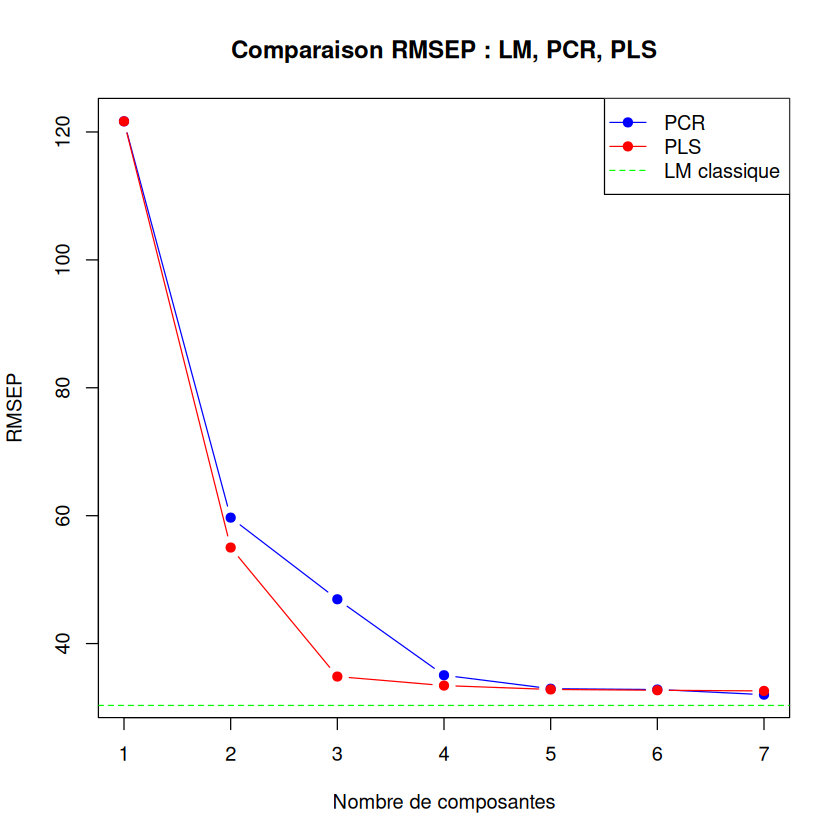

In [ ]:

# régression PCR
pcr_model <- pcr(y ~ ., data = X, scale = TRUE, validation = "CV")
summary(pcr_model)

# régression PLS
pls_model <- plsr(y ~ ., data = X, scale = TRUE, validation = "CV")
summary(pls_model)

# 6️⃣ Comparer les erreurs RMSEP
rmsep_lm <- sqrt(mean((y - predict(lm_model, X))^2))
rmsep_pcr <- RMSEP(pcr_model)$val[1,,]   # RMSEP par nombre de composantes
rmsep_pls <- RMSEP(pls_model)$val[1,,]

# 7️⃣ Tracer les RMSEP en fonction du nombre de composantes
par(bg = 'white')
plot(rmsep_pcr, type = "b", col = "blue", pch = 19,
     xlab = "Nombre de composantes", ylab = "RMSEP",
     main = "Comparaison RMSEP : LM, PCR, PLS")
lines(rmsep_pls, type = "b", col = "red", pch = 19)
abline(h = rmsep_lm, col = "green", lty = 2)
legend("topright", legend = c("PCR", "PLS", "LM classique"),
       col = c("blue", "red", "green"), pch = c(19,19,NA), lty = c(1,1,2))